In [6]:
import pandas as pd 

In [7]:
df_1gpus = pd.read_csv("vllm-benchmark-1GPUs.csv")
df_1gpus.head()

,time,tokens_generated
0,6.102792,200
1,6.106663,200
2,6.101967,200
3,5.947858,195
4,6.101686,200


In [8]:
df_4gpus = pd.read_csv("vllm-benchmark-4GPUs.csv")
df_4gpus.head()

,time,tokens_generated
0,3.233016,200
1,4.018353,200
2,3.596194,200
3,3.482750,200
4,3.311085,200


In [12]:
len(df_1gpus)

59

In [13]:
print(f"Total time taken to complete 59 texts on a single GPU=", df_1gpus.time.sum())
print(f"Total time taken to complete 59 texts on four GPUs=", df_4gpus.time.sum())

Total time taken to complete 59 texts on a single GPU= 320.90016099500144
Total time taken to complete 59 texts on four GPUs= 165.85892114899994


In [15]:
df_1gpus["tokens_per_sec"] = df_1gpus.tokens_generated / df_1gpus.time
df_4gpus["tokens_per_sec"] = df_4gpus.tokens_generated / df_4gpus.time

In [16]:
print(f"Average tokens/sec on a single GPU =", df_1gpus.tokens_per_sec.mean())
print(f"Average tokens/sec on a four GPUs =", df_4gpus.tokens_per_sec.mean())

Average tokens/sec on a single GPU = 32.66893882049349
Average tokens/sec on a four GPUs = 60.84242229197367


In [18]:
import matplotlib.pyplot as plt

In [21]:
?plt.bar

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


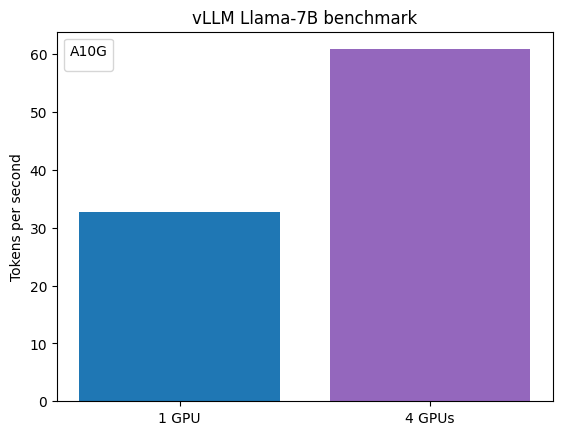

In [30]:
X = [df_1gpus.tokens_per_sec.mean(), df_4gpus.tokens_per_sec.mean()]

fig, ax = plt.subplots()
bar_colors = ['tab:blue', 'tab:purple']
ax.bar(["1 GPU", "4 GPUs"], X, color=bar_colors)
ax.set_ylabel('Tokens per second')
ax.set_title('vLLM Llama-7B benchmark')
ax.legend(title='A10G')
plt.show()
